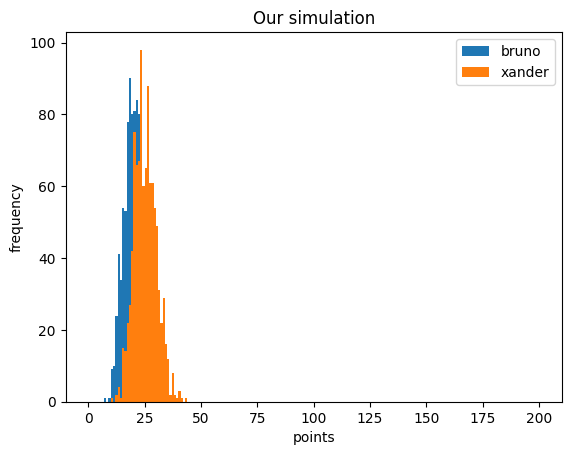

In [49]:
import random
import matplotlib.pyplot as plt

def hundred_shots():
    bruno_count = 0
    xander_count = 0 
    for i in range(100):
        bruno = random.randrange(100)
        xander = random.randrange(100)   
        if bruno < 20 and xander >= 25:  # Bruno makes it, xander doesnt
            bruno_count += 1
        if bruno >= 20 and xander < 25:  # Xander makes it, bruno doesnt
            xander_count += 1
        # Don't add anything in case of a tie
    return (bruno_count, xander_count)

def plot_thousand():
    bruno_list = []
    xander_list = []
    x_axis = []
    for i in range(1000):
        totals = hundred_shots()
        bruno_list.append(totals[0])
        xander_list.append(totals[1])
        x_axis.append(i + 1)
    return (bruno_list, x_axis, xander_list)

def bruno_makes():
    bruno = random.randrange(100)
    if bruno < 20:
        return True
    return False

def bruno_gets_ball_back():
    bruno = random.randrange(100)
    if bruno < 60:
        return True
    return False



def xander_makes():
    xander = random.randrange(100)
    if xander < 25:
        return True
    return False

def gets_ball_back(cur_person):
    if cur_person == 'bruno':
        bruno = random.randrange(100)
        if bruno < 25:
            return 'bruno'
        return 'xander'
    else:  #cur person is x
        xander = random.randrange(100)
        if xander < 20:
            return 'xander'
        return 'bruno'


def old_part_two():
    cur_person = 0  #bruno 0 xander 1
    bruno_points = 0
    xander_points = 0
    for i in range(200):
        if cur_person == 0:
            if bruno_makes():
                bruno_points += 1
                continue
            if not bruno_gets_ball_back():
                cur_person = 1
        else:  # cur_person is xander
            if xander_makes():
                xander_points += 1
                continue
            if bruno_gets_ball_back():
                cur_person = 0
    #print('Bruno:', bruno_points, 'Xander:', xander_points)
    return(bruno_points, xander_points)

def part_two():
    cur_person = 'bruno'  #bruno 0 xander 1
    bruno_points = 0
    xander_points = 0
    for i in range(200):
        if cur_person == 'bruno':
            if bruno_makes():
                bruno_points += 1
                continue
            cur_person = gets_ball_back(cur_person)
        else:  # cur_person is xander
            if xander_makes():
                xander_points += 1
                continue
            cur_person = gets_ball_back(cur_person)
    return(bruno_points, xander_points)

def thousand_simulations():
    xander_scores = []
    bruno_scores = []
    for i in range(1000):
        b, x = part_two()
        bruno_scores.append(b)
        xander_scores.append(x)
    plt.hist(x=bruno_scores, bins=[i for i in range(201)])
    plt.hist(x=xander_scores, bins=[i for i in range(201)])
    plt.legend(['bruno', 'xander'])
    plt.xlabel('points', fontsize=10)
    plt.ylabel('frequency', fontsize=10)
    plt.title('Our simulation')

thousand_simulations()


# plt.plot(plot_thousand()[1], plot_thousand()[0], linewidth=1)
# plt.xlabel('Number of simulations', fontsize=10)
# plt.ylabel('bruno wins', fontsize=10)
# plt.title('')
# plt.show()

# plt.plot(plot_thousand()[1], plot_thousand()[2], linewidth=1)
# plt.xlabel('Number of simulations', fontsize=10)
# plt.ylabel('xander wins', fontsize=10)
# plt.title('')
# plt.show()
